<a href="https://colab.research.google.com/github/YazhiniRaja27/Image-Skew-Correction-using-OpenCV/blob/main/Image_Skew_Correction_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project demonstrates how to detect and correct skew in an image using OpenCV in Python. It involves loading a grayscale image, applying image preprocessing techniques such as binarization and Canny edge detection, and then utilizing the Hough Line Transform to identify lines within the image. From the detected lines, the skew angle of the image is calculated. Finally, the image is rotated by the calculated skew angle to produce a corrected, deskewed image. The original and corrected images are displayed for visual comparison.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python numpy

Skew Image:


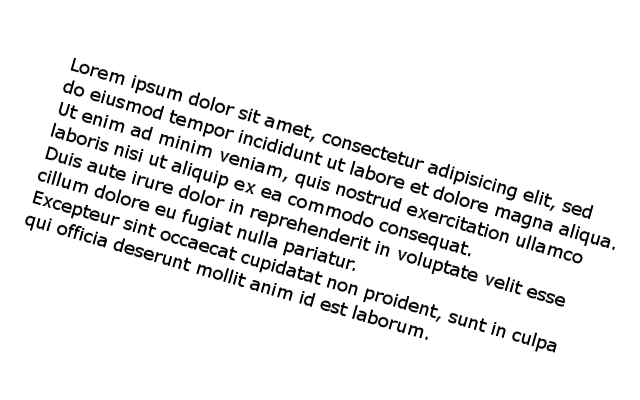

Detected skew angle: 16.11 degrees
Corrected Image:


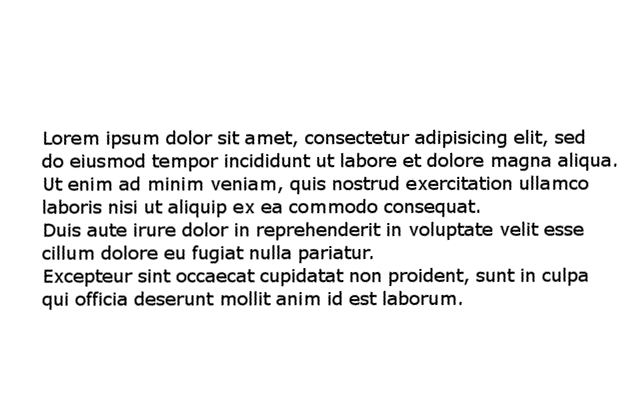

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the grayscale image
image_path = '/content/drive/MyDrive/skew.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original skewed image
print("Skew Image:")
cv2_imshow(image)

# Preprocess the image (binarization)
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Edge detection using Canny
edges = cv2.Canny(binary, 50, 150, apertureSize=3)

# Apply Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

if lines is not None:
    # Calculate the angles of the detected lines
    angles = []
    for rho, theta in lines[:, 0]:
        angle = theta - np.pi / 2  # Adjust angle to align with the image's orientation
        angles.append(angle)

    # Calculate the average angle
    average_angle = np.mean(angles)
    skew_angle = average_angle * 180 / np.pi  # Convert from radians to degrees
    print(f"Detected skew angle: {skew_angle:.2f} degrees")

    # Rotate the image to correct the skew
    (h, w) = image.shape
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, skew_angle, 1.0)
    corrected_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    # Display the corrected image
    print("Corrected Image:")
    cv2_imshow(corrected_image)
else:
    print("No lines were detected. Try adjusting the parameters.")
